In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
# Carregando os dados e ajustando o datetime
tsla_data = pd.read_csv("data/TSLA.csv")
tsla_data["Date"] = pd.to_datetime(tsla_data["Date"])

tsla_data = pd.Series(tsla_data["Adj Close"].values, index = tsla_data["Date"])
tsla_data

Date
2010-06-29      1.592667
2010-06-30      1.588667
2010-07-01      1.464000
2010-07-02      1.280000
2010-07-06      1.074000
                 ...    
2024-08-15    214.139999
2024-08-16    216.119995
2024-08-19    222.720001
2024-08-20    221.100006
2024-08-21    223.270004
Length: 3561, dtype: float64

In [128]:
def moving_variance(data, start_date, finish_date, window_size):
    return data[(data.index >= start_date) & (data.index < finish_date)].rolling(window = window_size).std()

def neutral_days(data, start_date, finish_date, window_size, threshold):
    filtered_data = data[(data.index >= start_date) & (data.index < finish_date)]

    mv = moving_variance(filtered_data, start_date, finish_date, window_size)
    neutral_days = filtered_data[mv.values < threshold]

    return neutral_days

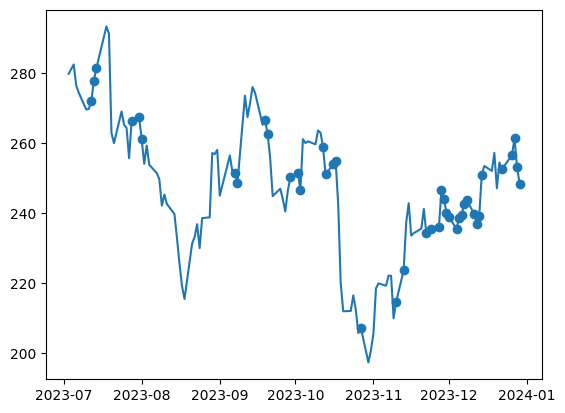

In [129]:
start_date = pd.to_datetime("2023-07-01")
finish_date = pd.to_datetime("2024-01-01")

nd = neutral_days(tsla_data, start_date, finish_date, 7, 5)

plt.plot(tsla_data[(tsla_data.index >= start_date) & (tsla_data.index < finish_date)])
plt.scatter(nd.index, nd.values)

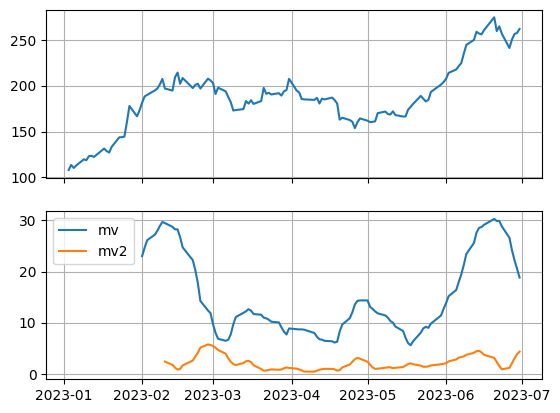

In [193]:
start_date = pd.to_datetime("2023-01-01")
finish_date = pd.to_datetime("2023-07-01")

mv = moving_variance(tsla_data, start_date, finish_date, 21)
mv2 = moving_variance(mv, start_date, finish_date, 8)
# short_mv = moving_variance(tsla_data, start_date, finish_date, 8)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)

ax1.plot(tsla_data[(tsla_data.index >= start_date) & (tsla_data.index < finish_date)])
ax2.plot(mv, label = "mv")
ax2.plot(mv2, label = "mv2")
# ax2.plot(short_mv, label = "short")
ax2.legend()
ax1.grid(True)
ax2.grid(True)

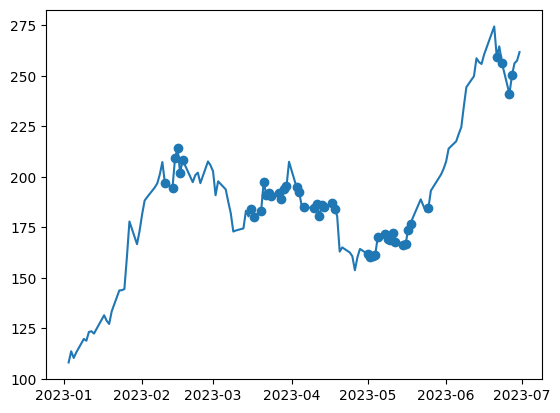

In [196]:
filtered_data = tsla_data[(tsla_data.index >= start_date) & (tsla_data.index < finish_date)]
nd2 = filtered_data[(mv.diff() < 0) & (mv2 < 2.5)]

plt.plot(tsla_data[(tsla_data.index >= start_date) & (tsla_data.index < finish_date)])
plt.scatter(nd2.index, nd2.values)